#**Guia Prático da Biblioteca CB2325-NUMERICA-G8**

Descrever a biblioteca resumidamente, colocar identificação dos autores

##Importação da Biblioteca

In [1]:
!pip install cb2325-numerica-g8

In [2]:
from cb2325numericag8.erros.erros import erro_absoluto, erro_relativo, erro_quadratico_medio
from cb2325numericag8.raizes.raizes import raiz
from cb2325numericag8.grafico.grafico_raizes import grafico as grafico_raizes
from cb2325numericag8.integracao.integracao import integral
from cb2325numericag8.grafico.grafico_integracao import grafico_simpson, grafico_trapezoidal
from cb2325numericag8.aproximacao.minimos_quadrados import AproximacaoPolinomial

##**Módulo de Erros**

A biblioteca contém a implementação de 3 métodos para cálculo de erros:

*   Erro Absoluto
*   Erro Relativo
*   Erro Quadrático Médio


###1. Erros - Erro Absoluto

A função que calcula o erro absoluto é:

___
```python
erro_absoluto(v_real, v_aproximado, precisao=None)
```
___

O cálculo do erro absoluto é feito por meio da fórmula a seguir:

$$Erro_{absoluto} = |v_{real} - v_{aproximado}|$$

A fim de evitar erros de ponto flutuante significativos, recomenda-se utilizar o parâmetro `precisao`, que define o número de casas decimais utilizadas no valor retornado. Caso não seja escolhido, será retornado o valor calculado sem arredondamentos.

Exemplo de uso:

Cálculo do erro absoluto entre o valor teórico $3.1415926$ e o valor aproximado $3$. O valor esperado é $0.1415926$.

####Calculando sem o parâmetro opcional

In [3]:
# 1. Defina os valores teórico e aproximado
v_teorico = 3.1415926
v_aproximado = 3

# 2. Chamada da função
erro_abs = erro_absoluto(v_teorico, v_aproximado)

# 3. Saída esperada (com erro de ponto flutuante)
print(erro_abs)

0.14159260000000007


####Calculando com o parâmetro opcional

In [4]:
# 1. Defina os valores teórico e aproximado
v_teorico = 3.1415926
v_aproximado = 3

# 2. Defina a precisão
prec = 5

# 3. Chamada da função
erro_abs = erro_absoluto(v_teorico, v_aproximado, precisao=prec)

# 4. Saída esperada
print(erro_abs)

0.14159


###2. Erros - Erro Relativo

A função que calcula o erro relativo é:

___
```python
erro_relativo(v_real, v_aproximado, precisao=None)
```
___

O cálculo do erro relativo é feito por meio da fórmula a seguir:

$$Erro_{relativo} = \left|\frac{v_{real} - v_{aproximado}}{v_{real}}\right|$$

Para esse cálculo, $v_{real}$ deve ser diferente de zero.

Exemplo de uso:

Cálculo do erro absoluto entre o valor teórico $4.5$ e o valor aproximado $3$. O valor esperado é $1/3\approx0.3333$.

####Calculando sem o parâmetro opcional

In [5]:
# 1. Defina os valores teórico e aproximado
v_teorico = 4.5
v_aproximado = 3

# 2. Chamada da função
erro_rel = erro_relativo(v_teorico, v_aproximado)

# 3. Saída esperada
print(erro_rel)

0.3333333333333333


####Calculando com o parâmetro opcional

In [6]:
# 1. Defina os valores teórico e aproximado
v_teorico = 4.5
v_aproximado = 3

# 2. Defina a precisão
prec = 5

# 3. Chamada da função
erro_rel = erro_relativo(v_teorico, v_aproximado, precisao=prec)

# 4. Saída esperada
print(erro_rel)

0.33333


###3. Erros - Erro Quadrático Médio

A função que calcula o erro quadrático médio é:

___
```python
erro_quadratico_medio(lista_real, lista_aproximada, precisao=None)
```
___

O cálculo do erro quadrático médio para $n$ valores é feito por meio da fórmula a seguir:

$$EQM = \frac{1}{n}\sum_{i=1}^{n}\left(lista_{real}[i] - lista_{aproximada}[i]\right)^2$$

Exemplo de uso:

Cálculo do erro quadrático médio para as listas a seguir:
- Lista real: $[1, 2, 3, 4, 5]$
- Lista aproximada: $[1, 2, 4, 3, 7.2]$

Valor esperado: $\frac{1}{5}\left((1-1)^2+(2-2)^2+(3-4)^2+(4-3)^2+(5-7.2)^2\right)=\frac{6.84}{5}=1.368$.

####Calculando sem o parâmetro opcional

In [7]:
# 1. Defina os valores teóricos e aproximados
lista_teorica = [1, 2, 3, 4, 5]
lista_aprox = [1, 2, 4, 3, 7.2]

# 2. Chamada da função
eqm = erro_quadratico_medio(lista_teorica, lista_aprox)

# 3. Saída esperada
print(eqm)

1.368


####Calculando com o parâmetro opcional

In [8]:
# 1. Defina os valores teóricos e aproximados
lista_teorica = [1, 2, 3, 4, 5]
lista_aprox = [1, 2, 4, 3, 7.2]

# 2. Defina a precisão
prec = 2

# 3. Chamada da função
eqm = erro_quadratico_medio(lista_teorica, lista_aprox, precisao=prec)

# 4. Saída esperada
print(eqm)

1.37


##**Módulo Raízes**

A biblioteca contém a implementação de 3 métodos numéricos para encontrar raízes de funções reais:

*   Método da Bisseção
*   Método da Secante
*   Método de Newton-Raphson

###1.  Parâmetros da Função `raiz()`

A função principal do módulo `raizes` é:

___
```python
raiz(funcao, a, b=None, f_prime=None, tol=1e-6, max_iter=1000, method="secante", mostrar_grafico=False)
```
___

Essa função encontra uma raiz real de uma equação $( f(x) = 0 )$ utilizando um dos três métodos numéricos: **Bisseção**, **Secante** ou **Newton-Raphson**.

| Parâmetro             | Bisseção | Secante | Newton-Raphson | Descrição                                                                                                                                 |
| :-------------------- | :------: | :-----: | :------------: | :---------------------------------------------------------------------------------------------------------------------------------------- |
| **`funcao`**          |     ✅    |    ✅    |        ✅       | Função ( f(x) ) cuja raiz se deseja encontrar. Deve estar previamente definida.                                                           |
| **`a`**               |     ✅    |    ✅    |        ✅       | **Bisseção:** limite inferior do intervalo. <br>• **Secante:** primeira estimativa inicial. <br>• **Newton-Raphson:** estimativa inicial. |
| **`b`**               |     ✅    |    ✅    |        ❌       | **Bisseção:** limite superior do intervalo. <br>• **Secante:** segunda estimativa inicial.                                                |
| **`f_prime`**         |     ❌    |    ❌    |       ⚠️       | Derivada de ( f(x) ). Necessária no Newton-Raphson; se ausente, é aproximada numericamente.                                               |
| **`tol`**             |     ✅    |    ✅    |        ✅       | Tolerância de erro: critério de parada. Quanto menor, mais precisa é a raiz.                                                              |
| **`max_iter`**        |     ✅    |    ✅    |        ✅       | Número máximo de iterações permitidas.                                                                                                    |
| **`method`**          |     ✅    |    ❌    |        ✅       | Escolhe o método: `"bissecao"`, `"secante"` ou `"newton_raphson"`, sendo `"secante"` o padrão.                                            |
| **`mostrar_grafico`** |     ❌    |    ❌    |        ❌       | Exibe gráfico de convergência se `True`. Opcional para visualização.                                                                      |


Legenda:
✅ obrigatório | ⚠️ recomendado | ❌ opcional


###2. Raízes - Método da Bisseção

Exemplo de uso:

Cálculo da raiz aproximada da função real $f(x) = x^2 - 2$ no intervalo $[a,b]~=[0,2]$ usando o método da bisseção. O valor esperado é $\sqrt{2}≈1,4142$.

####Calculando o valor numérico da raiz

In [9]:
#1. Defina a função de entrada
def f(x):
    return x**2 - 2

#2. Utilizar o método na função de entrada
raiz0,_ = raiz(f, a=0, b=2, tol=1e-6, method="bissecao")

#3. Saída esperada
print("A raiz aproximada encontrada foi: ", raiz0)

A raiz aproximada encontrada foi:  1.4142141342163086


####Exibindo o Gráfico Automaticamente

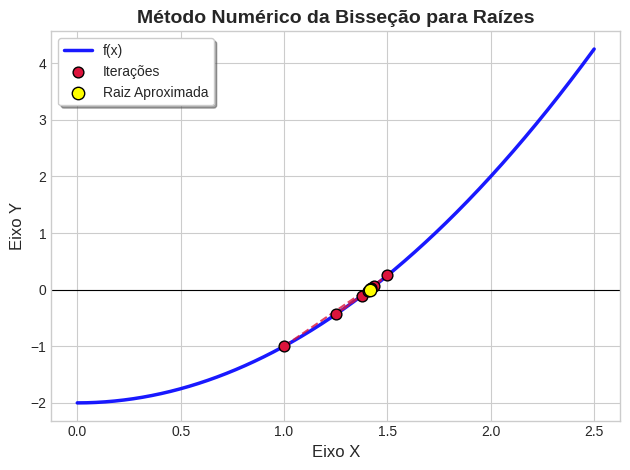

A raiz aproximada encontrada foi:  1.4142141342163086


In [10]:
#1. Defina a função de entrada
def f(x):
    return x**2 - 2

#2. Utilizar o método na função de entrada
raiz0,_ = raiz(f, a=0, b=2, tol=1e-6, method="bissecao", mostrar_grafico=True)

#3. Saída esperada
print("A raiz aproximada encontrada foi: ", raiz0)

####Chamando o Gráfico Posteriormente

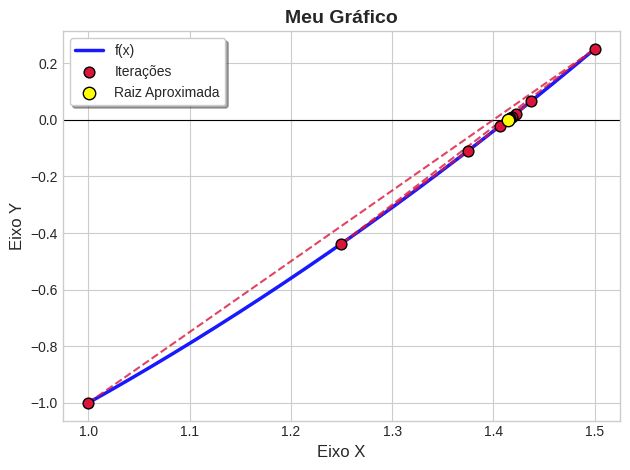

In [11]:
#1. Defina a função de entrada
def f(x):
    return x**2 - 2

#2. Utilizar o método na função de entrada
_,iter0 = raiz(f, a=0, b=2, tol=1e-6, method="bissecao")

#3. Plotar o gráfico no intervalo reduzido (zoom)
grafico_raizes(f, iter0, a=1, b=1.5, titulo_metodo="Meu Gráfico")


###3. Raízes - Método da Secante

Exemplo de uso:

Cálculo da raiz aproximada da função real $g(x) = x^3 -9x +5$ tomando como estimativas iniciais os valores $a=0$ e $b=2$ usando o método da secante. O valor esperado é $≈0,576887$.

####Calculando o valor numérico da raiz

In [12]:
#1. Defina a função de entrada
def g(x):
    return x**3 - 9*x + 5

#2. Utilizar o método na função de entrada
raiz1,_ = raiz(g, a=0, b=2, tol=1e-6, method="secante")

#3. Saída esperada
print("A raiz aproximada encontrada foi: ", raiz1)

A raiz aproximada encontrada foi:  0.5768876056967759


####Exibindo o Gráfico Automaticamente

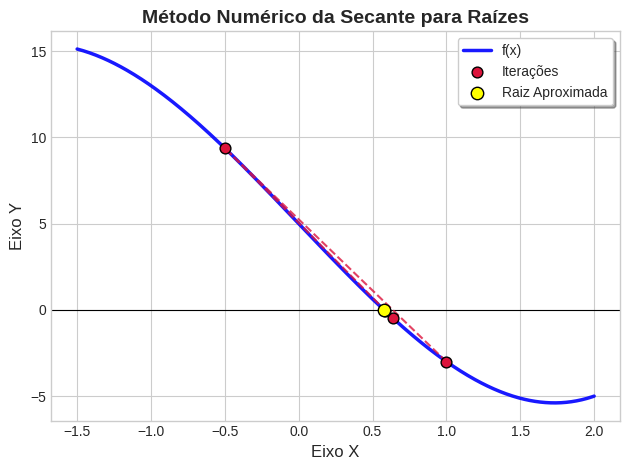

A raiz aproximada encontrada foi:  0.5768876056967759


In [13]:
#1. Defina a função de entrada
def g(x):
    return x**3 - 9*x + 5

#2. Utilizar o método na função de entrada
raiz1,_ = raiz(g, a=0, b=2, tol=1e-6, method="secante", mostrar_grafico=True)

#3. Saída esperada
print("A raiz aproximada encontrada foi: ", raiz1)

####Chamando o Gráfico Posteriormente

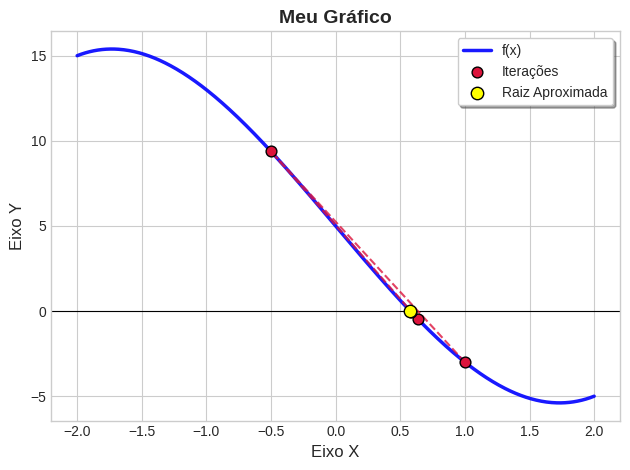

In [14]:
#1. Defina a função de entrada
def g(x):
    return x**3 - 9*x + 5

#2. Utilizar o método na função de entrada
_,iter1 = raiz(g, a=0, b=2, tol=1e-6, method="secante")

#3. Plotar o gráfico no intervalo escolhido
grafico_raizes(g, iter1, a=-2, b=2, titulo_metodo="Meu Gráfico")

###4. Raízes - Método de Newton-Raphson

Exemplo de uso:

Cálculo da raiz aproximada da função real $h(x) = x^{10} - 5$ tomando como estimativa inicial o valor $a=2$ e fornecendo a derivada da função que é $h'(x)=10x^9$ usando o método de newton-raphson. O valor esperado é $≈1,174618$.

####Calculando o valor numérico da raiz

In [15]:
#1. Defina as funções de entrada
def h(x):
     return x**10 - 5

def h_prime(x):
     return 10 * x**9

#2. Utilizar o método nas funções de entrada
raiz2,_ = raiz(h, a=2, f_prime=h_prime, tol=1e-6, method="newton_raphson")

#3. Saída esperada
print("A raiz aproximada encontrada foi: ", raiz2)

A raiz aproximada encontrada foi:  1.174618943088019


####Exibindo o Gráfico Automaticamente

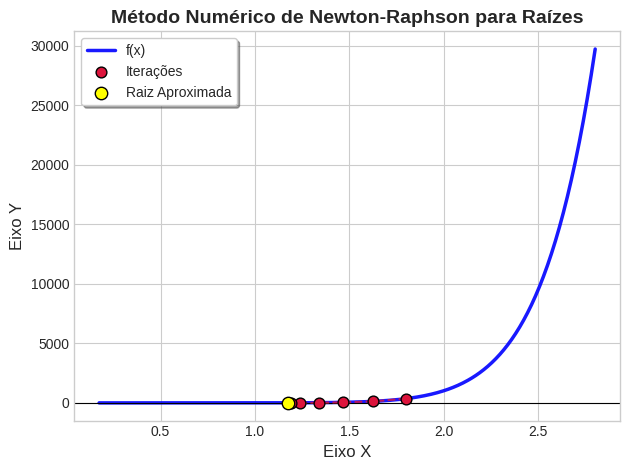

A raiz aproximada encontrada foi:  1.174618943088019


In [16]:
#1. Defina as funções de entrada
def h(x):
     return x**10 - 5

def h_prime(x):
     return 10 * x**9

#2. Utilizar o método nas funções de entrada
raiz2,_ = raiz(h, a=2, f_prime=h_prime, tol=1e-6, method="newton_raphson", mostrar_grafico=True)

#3. Saída esperada
print("A raiz aproximada encontrada foi: ", raiz2)

####Chamando o Gráfico Posteriormente

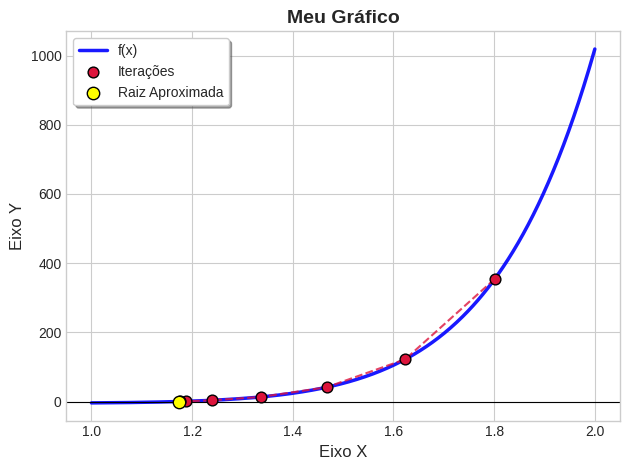

In [17]:
#1. Defina as funções de entrada
def h(x):
     return x**10 - 5

def h_prime(x):
     return 10 * x**9

#2. Utilizar o método nas funções de entrada
_,iter2 = raiz(h, a=2, f_prime=h_prime, tol=1e-6, method="newton_raphson")

#3. Plotar o gráfico no intervalo reduzido
grafico_raizes(h, iter2, a=1, b=2, titulo_metodo="Meu Gráfico")


###5. Raízes - Comparativo entre os métodos

A eficiência de cada método numérico para o cálculo de raízes depende fortemente da **função escolhida** e dos **parâmetros fornecidos**, como os valores iniciais, a tolerância e o número máximo de iterações. Em termos gerais, o método da bisseção apresenta menor complexidade conceitual**, sendo o mais simples e robusto — ele garante convergência sempre que houver mudança de sinal no intervalo $([a, b])$. Entretanto, essa robustez vem ao custo de uma convergência lenta, pois o intervalo é apenas dividido ao meio a cada passo.

Por outro lado, os métodos da secante e de Newton-Raphson possuem maior eficiência computacional**, apresentando uma complexidade de convergência mais alta (ordens superiores à do método da bisseção). Em contrapartida, eles são mais sensíveis à escolha dos valores iniciais e ao comportamento local da função — o que pode levar à divergência ou oscilação caso a função apresente variações bruscas, descontinuidades ou derivadas próximas de zero.

O código abaixo demonstra um exemplo comparativo do tempo de execução e do número de iterações necessários para a convergência de cada método numérico, dada uma função específica.


In [18]:
import time
import numpy as np
from cb2325numericag8.raizes.raizes import raiz

def f(x):
    return x**3 - 9*x + 5

# Bisseção
t0 = time.time()
_, iter_b = raiz(f, a=0, b=2, tol=1e-6, method="bissecao")
t1 = time.time()

# Secante
t2 = time.time()
_, iter_s = raiz(f, a=0, b=2, tol=1e-6, method="secante")
t3 = time.time()

# Newton-Raphson
def f_prime(x): return 3*x**2 - 9
t4 = time.time()
_, iter_n = raiz(f, a=1, f_prime=f_prime, tol=1e-6, method="newton_raphson")
t5 = time.time()

print(f"Bisseção: {len(iter_b)} iterações, {t1-t0:.6f} s")
print(f"Secante: {len(iter_s)} iterações, {t3-t2:.6f} s")
print(f"Newton-Raphson: {len(iter_n)} iterações, {t5-t4:.6f} s")


Bisseção: 20 iterações, 0.000113 s
Secante: 6 iterações, 0.000083 s
Newton-Raphson: 4 iterações, 0.000081 s


##**Módulo de Integração Numérica**

A biblioteca contém a implementação de dois métodos numéricos para cálculo de integrais de funções reais de uma variável:


1.   Método do Trapézio
2.   Método de Simpson

###1. Parâmetros da Função `integral()`

A função principal do módulo `integracao` é:

___
```python
integral(funcao, a, b, n=100, mostrar_grafico=False, precisao=None, metodo='Trapezoidal')
```
___

Essa função calcula numericamente a integral de uma função $f(x)$ utilizando um dos dois métodos numéricos: **Trapézio** ou **Simpson**.

| Parâmetro             | Trapézio | Simpson | Descrição                                                                                                                                                                               |
| :-------------------- | :------: | :-----: | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **`funcao`**          |     ✅    |    ✅    | Função a ser integrada.                                                                                                               |
| **`a`**               |     ✅    |    ✅    | Limite inferior do intervalo de integração.                                                                                           |
| **`b`**               |     ✅    |    ✅    | Limite superior do intervalo de integração.                                                                                           |
| **`n`**               |     ⚠️    |    ⚠️    | Número de subdivisões do intervalo de integração; se ausente, é utilizado o valor padrão 100.                                         |
| **`mostrar_grafico`** |     ❌    |    ❌    | Exibe gráfico da função e da aproximação se `True`. Opcional para visualização.                                                       |
| **`precisao`**        |     ❌    |    ❌    | Define o número de casas decimais no valor retornado; se ausente é retornado o valor com o maior número de casas decimais possível.   |
| **`metodo`**          |     ⚠️    |    ⚠️    | Escolhe o método: `"Trapezoidal"` ou `"Simpson"`, sendo `"Trapezoidal"` o padrão.                                                     |

Legenda:
✅ obrigatório | ⚠️ recomendado | ❌ opcional


###2. Integração - Método do Trapézio

Exemplo de uso:

Cálculo da integral aproximada de $x^3-x^2$ no intervalo $[0, 2]$, utilizando o método do Trapézio. O valor esperado é $4/3\approx1.333$.

####Calculando o valor numérico da integral

In [19]:
# 1. Defina a função a ser integrada
def f(x):
    return x**3 - x**2

# 2. Defina o intervalo de integração
a = 0
b = 2

# 3. Escolha número de subdivisões do intervalo [a, b], precisão e método (opcionais)
# Caso não sejam escolhidos, o valor padrão é 100 para a quantidade de subdivisões, 'Trapezoidal' para o método e precisão máxima
num = 50
prec = 4
metodo_funcao = 'Trapezoidal'

# 4. Chamada da função
valor = integral(f, a, b, n=num, precisao=prec, metodo=metodo_funcao)

# 5. Saída esperada
print(f"Valor da integral - Método do Trapézio: {valor}")

Valor da integral - Método do Trapézio: 1.3344


####Omitindo parâmetros opcionais

In [20]:
# 1. Defina a função a ser integrada
def f(x):
    return x**3 - x**2

# 2. Defina o intervalo de integração
a = 0
b = 2

# 3. Chamada da função
valor = integral(f, a, b)

# 4. Saída esperada
print(f"Valor da integral - Método do Trapézio (padrão): {valor}")

Valor da integral - Método do Trapézio (padrão): 1.3336000000000001


####Exibindo o gráfico automaticamente

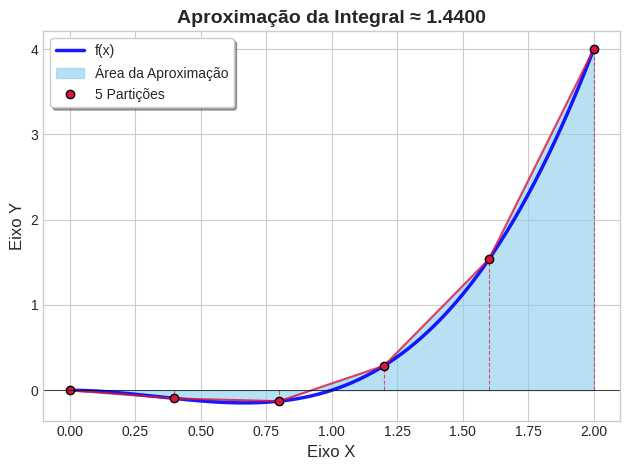

Valor da integral - Método do Trapézio + Gráfico: 1.4400000000000004


In [21]:
# 1. Defina a função a ser integrada
def f(x):
    return x**3 - x**2

# 2. Defina o intervalo de integração
a = 0
b = 2

# 3. Chamada da função
valor = integral(f, a, b, n=5, mostrar_grafico=True, metodo='Trapezoidal')

# 4. Saída esperada:
print(f"Valor da integral - Método do Trapézio + Gráfico: {valor}")

####Chamando o gráfico posteriormente

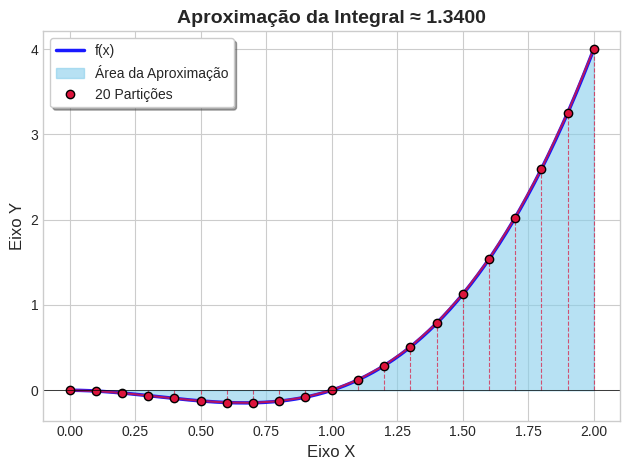

In [22]:
# 1. Defina a função a ser integrada
def f(x):
    return x**3 - x**2

# 2. Defina o intervalo de integração
a = 0
b = 2

# 3. Defina o número de pontos para desenhar o gráfico da curva (valor padrão pela chamada automática é 300),
# a quantidade de subdivisões do intervalo no gráfico e o valor numérico da integral
pontos_curva = 300
subdivisoes = 20
valor_area = integral(f, a, b, n=subdivisoes)

# 4. Chamada da função
grafico_trapezoidal(f, a, b, s=pontos_curva, area=valor_area, n=20)

###3. Integração - Método de Simpson

Exemplo de uso:

Cálculo da integral aproximada de $x^3-x^2$ no intervalo $[0, 2]$, utilizando o método de Simpson. O valor esperado é $4/3\approx1.333$.

####Calculando o valor numérico da integral

In [23]:
# 1. Defina a função a ser integrada
def f(x):
    return x**3 - x**2

# 2. Defina o intervalo de integração
a = 0
b = 2

# 3. Escolha número de subdivisões do intervalo [a, b], precisão e método (opcionais)
num = 50
prec = 4
metodo_funcao = 'Simpson'

# 4. Chamada da função
valor = integral(f, a, b, n=num, precisao=prec, metodo=metodo_funcao)

# 5. Saída esperada
print(f"Valor da integral - Método de Simpson: {valor}")

Valor da integral - Método de Simpson: 1.3333


####Exibindo o gráfico automaticamente

Aviso: número de divisões do intervalo de integração deve ser par. Ajustado para 6.


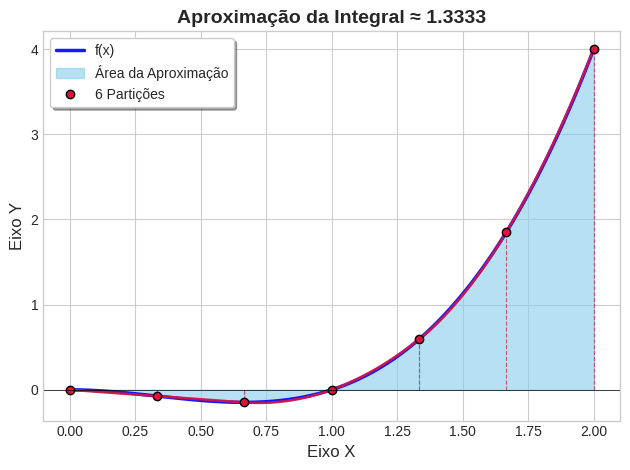

Valor da integral - Método de Simpson + Gráfico: 1.3333333333333326


In [24]:
# 1. Defina a função a ser integrada
def f(x):
    return x**3 - x**2

# 2. Defina o intervalo de integração
a = 0
b = 2

# 3. Chamada da função
valor = integral(f, a, b, n=5, mostrar_grafico=True, metodo='Simpson')

# 4. Saída esperada
print(f"Valor da integral - Método de Simpson + Gráfico: {valor}")

####Chamando o gráfico posteriormente

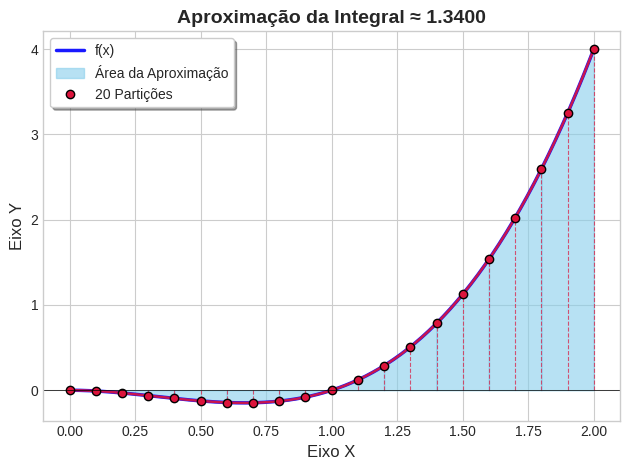

In [25]:
# 1. Defina a função a ser integrada
def f(x):
    return x**3 - x**2

# 2. Defina o intervalo de integração
a = 0
b = 2

# 3. Defina o número de pontos para desenhar o gráfico da curva (valor padrão pela chamada automática é 300),
# a quantidade de subdivisões do intervalo no gráfico e o valor numérico da integral
pontos_curva = 300
subdivisoes = 20
valor_area = integral(f, a, b, n=subdivisoes)

# 4. Chamada da função
grafico_simpson(f, a, b, s=pontos_curva, area=valor_area, n=20)

##**Módulo Interpolação**

###2. Interpolação de Hermite

Exemplo de uso

Vamos computar o valor de $H(x) = -x^3 + x^2 + x + 1$ no ponto $x = 0.5$. É esperado que $H(0.5) = 1.625$


In [26]:
from cb2325numericag8.interpolacao.interpolador_hermite import InterpoladorHermite

vetorx = [0, 1]
vetory = [1, 2]
vetory_deriv = [1, 0]

p = InterpoladorHermite(vetorx, vetory, vetory_deriv)

print(p(0.5))

1.625


#### Chamando o grafico

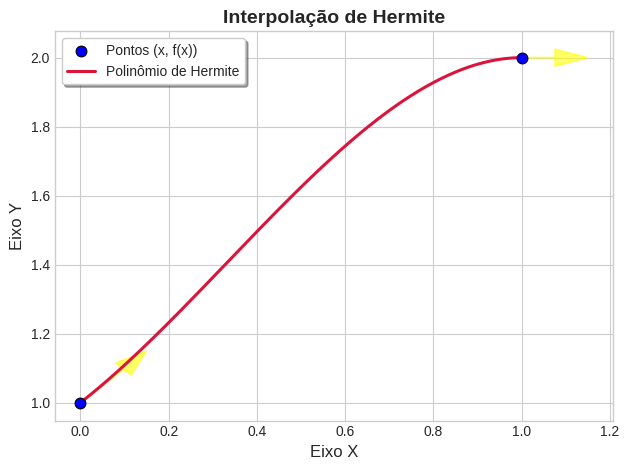

In [27]:
p.grafico()

##Módulo Aproximação

A biblioteca contém a implementação de 2 métodos para aproximar os pontos (x, y) por um polinômio de grau n usando mínimos quadrados e plota o gráfico.



*   Aproximação Polinomial
*   Regressão linear



###1. Aproximação Polinomial (Biblioteca minimos_quadrados)
Exemplos de uso da função na biblioteca minimos_quadrados


Argumentos da função AproximacaoPolinomial:

**(abscissas: list, ordenadas: list, grau: int = 1, plot: bool = False, n: int = 500) -> list**

*   abscissas (list ou tuple): coordenadas x
*   ordenadas (list ou tuple): coordenadas y
*   grau (int, opicional): grau do polinômio. Padrão é 1
*   plot (bool, opicional): Se True, plota o gráfico. Padrão é False
*   n (int, opcional): Número de pontos para a curva suave caso plot = True . Padrão é 500

####Exemplo de uma entrada com dados perfeitamente lineares

In [28]:
x = [0, 1, 2, 3, 4]
y = [1, 3, 5, 7, 9]  # y = 2x + 1

coef = AproximacaoPolinomial(x, y)
print("Coeficientes:", coef)  # Esperado: [2, 1]


Coeficientes: (2.0, 1.0)


####Exemplo de dados não perfeitamente lineares

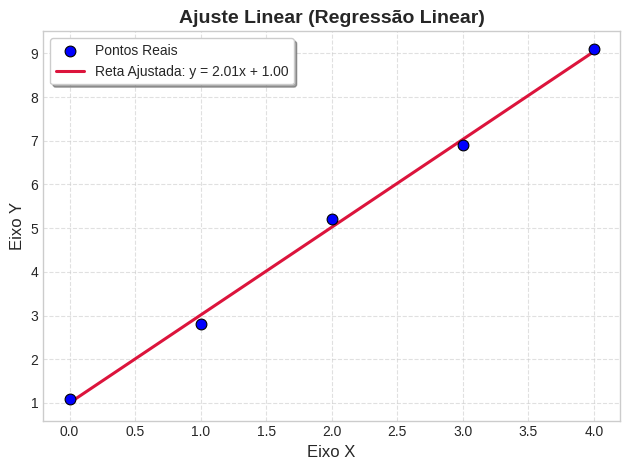

Coeficientes aproximados: (2.01, 1.0000000000000007)


In [29]:
x = [0, 1, 2, 3, 4]
y = [1.1, 2.8, 5.2, 6.9, 9.1]  # Dados com ruído

coef = AproximacaoPolinomial(x, y, plot=True)
print("Coeficientes aproximados:", coef)


####Exemplos diversos da aplicação da função

In [30]:
# Função original: y = 2x² - 3x + 5
x = [-2, -1, 0, 1, 2]
y = [2*xi**2 - 3*xi + 5 for xi in x]

coef = AproximacaoPolinomial(x, y, grau=2)
print("Coeficientes:", coef)  # Esperado: [2, -3, 5]


Coeficientes: [2.0, -3.0, 5.0]


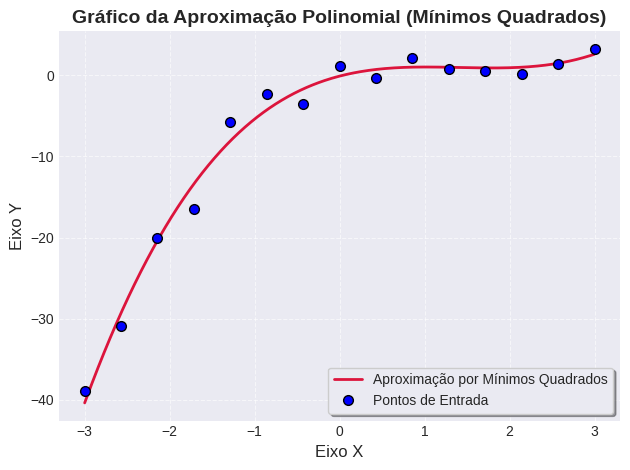

Coeficientes estimados: [0.4946394714, -2.089575573, 2.7178338609, -0.0845875325]


In [31]:
import numpy as np

# Criando pontos de uma função cúbica com ruído
x = list(np.linspace(-3, 3, 15))
y = [0.5*xi**3 - 2*xi**2 + 3*xi + np.random.normal(0, 2) for xi in x]

coef = AproximacaoPolinomial(x, y, grau=3, plot=True)
print("Coeficientes estimados:", coef)


In [32]:
x = [0, 1, 2, 3, 4]
y = [2.1, 2.9, 3.8, 5.1, 5.9]

for g in [1, 2, 3]:
    coef = AproximacaoPolinomial(x, y, grau=g)
    print(f"Grau {g}: {coef}")


Grau 1: (0.98, 2.0)
Grau 2: [0.0285714286, 0.8657142857, 2.0571428571]
Grau 3: [-0.05, 0.3285714286, 0.4357142857, 2.1171428571]


####Exemplos de erros que a função levanta caso os argumentos forem inválidos

In [33]:
try:
    AproximacaoPolinomial([1,2,3], [2,4,6], grau=3)
except Exception as e:
    print("Erro:", e)


Erro: O grau do polinômio aproximado (argumento 3) deve ser menor que o número de pontos fornecidos (argumento 1)


In [34]:
try:
    AproximacaoPolinomial([1,2,3], [2,4], grau=1)
except Exception as e:
    print("Erro:", e)


Erro: O número de abscissas (argumento 1) é maior que o número de ordenadas (argumento 2)
